# **Skimage Project: Pneumonia Feature Engineering**

# Introduction

Last unit, I worked on a project where I built a machine learning model to detect pneumonia. The model was trained to look for features and patterns to figure out which X-ray images had pneumonia or not. It was pretty amazing because I didn’t have any domain knowledge about pneumonia, but somehow the machine learning model was able to learn it on its own. That got me thinking—if I’m making a model to detect pneumonia, it would probably help if I knew more about X-rays and what to look for.

So, for this project, I’m using the same dataset as before, but instead of focusing on the machine learning model, I’m doing my own learning to figure out what pneumonia looks like in these images. Now, I’m not a radiologist, but I’ve watched some videos and done a bit of research to understand how pneumonia shows up. Based on what I’ve learned, I came up with ways to identify pneumonia and measure these differences myself.

In this project, I use feature engineering to extract and quantify features from images to highlight the differneces between normal and pneumonia X-rays. By doing this, I hope to group the images so that pneumoina cases cluster together, and normal cases do the same. Here's the general breakdown of my feature engineering process:

1. Initial Feature Extraction
2. First PCA Analysis
3. Image Convolution
4. Otsu Thresholding
5. Canny Edge Detection
6. Skeletonization
7. Second Feature Extraction
8. Second PCA Analysis
9. T- Test

Now that I mapped out the process, let's dive into feature engineering with the help of AI.

# Initial Feature Extraction

When I started my project, I wasn't too sure where to start. So, I used ChatGPT to help me start the project and used it to give me an example of what feature engineering could look like for this dataset. I also asked it what are some good features to include in my analysis and told it that I wanted to try to extract the features using scikit-image. So, it generated me some code for this, which essentially does the feature extraction for me. Here is what it did.

First, it imported a bunch of packages and functions necessary for the extraction:

os: reading in data from my computer

numpy: numerical operations

pandas: creating a dataframe and saving it

skimage.io: load X-ray image for processing

skimage.filters: apply hysterisis thresholding to image

skimage.feature.graycomatrix: calculate the gray-level co-occurence Matrix (GLCM); a texture tool that examines how pixle intensities vary in relation to one another 

skimage.feature.graycoprops: calculate texture properties of a GLCM, like contrast, correlation, energy, and homogeneity

skimage.feature.local_binary_pattern: Compute the local binary patterns (LBP) of an image; creates binary pattern for each pixel by checking if its neighboring pixels are brighter or darker than itself

skimage.feature.hog: extract Histogram of Oriented Gradients (HOG) for a given image, a feature describing edge directions and magnitudes

skimage.measure.regionprops: analyzes the binary image to extract shape features like area, perimeter, eccentricity, solidity, and compactness

skimage.measure.shannon_entropy: meausres the randomness or complexity of pixel intensities in the image

skimage.filters.sobel: detects edges in the image by highlighting areas with high intensity gradients

skimage.filters.threshold_otsu: return threshold value based on Otsu's method

scipy.stats.skew: measures the asymmetry of pixel intensity distribution

scipy.stats.kurtosis: measures how "peaky" or "flat" the puxel intensity distribution is

In [146]:
# ChatGPT generated -------------------------------------------------------------\
import os
import numpy as np
import pandas as pd
from skimage import io, filters
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.measure import regionprops, shannon_entropy
from skimage.filters import sobel, threshold_otsu
from scipy.stats import skew, kurtosis

Then, it found the directory of my data using the same code and directory from my sci-kit_learn project. For this project, we don't need to use all the datasets from the chest X-ray data since we are focused on feature engineering, extraction, and EDA.

In [147]:
# base path
base_path = '/Users/axellejimenez/Desktop/chest_xray'

# define the categories and the split to process
split = 'train'
categories = ['NORMAL', 'PNEUMONIA']

Then, it made a numy array that holds the feature data from the feature engineering. It stored the values for later, when it turned the array into a pandas dataframe.

In [148]:
# ChatGPT generated --------------
# initialize the feature storage
feature_data = []

Then, it looks into my 'NORMAL' and 'PNEUMONIA' folders and gets the first 25 images from each of those folders. I decided to sample 50 images in total, hoping that it would be a good start to my feature extraction and determine if the differences in these features are obvious for these images.

From there, it actually processed the images. First, it loaded the images, and converted the images to uint8 (unassigned 8-bit integers - represents integer values from 0 (black) to 255 (white)). Secondly, it made an array that holds the types of features in the extraction. 

From there, it pulled various features for texture, shapes, edge and complecity, statisical, and  histogram. Here's a breakdown of what each of these features are and what they mean in the context for my pneumonia feature engineering:

Contrast: This one is all about how much light and dark areas of an image stand out from each other. High contrast means big differences between light and spots, which is useful for highlighting the edges of pneumonia-infected areas. From what I've seen, low contrast usually means the image has pneumonia since the colors tend to blend together, not really standing apart. For healthy lungs, you’ll see a lot more contrast, where the dark and light areas are clearly separated.  

Correlation: This feature looks at how related pixels are to each other. If the image has smooth, even patterns (like healthy tissue), correlation will be high. When it’s low, it suggests that the pixels don’t follow the same regular pattern, which might mean something abnormal is happening, like pneumonia. Essentially, higher correlation means the image looks more normal, while low correlation might be a red flag for pneumonia.

Energy: Energy measures how smooth or uniform the image is. If everything in the image looks pretty much the same (like healthy lung tissue), energy will be high. If there’s a lot of variation (like with pneumonia), the energy will be low. Healthy lung tissue usually has smooth and even textures, so energy is higher, whereas pneumonia might cause rough or irregular textures, resulting in lower energy.  

Homogeneity: Homogeneity is about how similar neighboring pixels are. If the pixels are pretty similar to each other, the region is said to have high homogeneity, which you’ll often see in healthy tissue. Lower homogeneity means you’re seeing more texture or irregularities in the image, which could signal infection, like pneumonia.  

Area: This one is pretty straightforward. It measures the size of an object or region in the image. For healthy lungs, you expect a consistent area for both lungs. If there’s pneumonia, the infected areas will have a different size compared to the normal tissue, which helps to point out abnormalities. 

Perimeter: Perimeter is just the boundary of an object. Normally, healthy lungs will have a fairly regular shape, so their perimeter will look pretty consistent. If something's wrong, like with pneumonia, the boundaries might look irregular, which is another clue.  

Eccentricity: Eccentricity tells you how much an object is stretched or skewed. If it’s a perfect circle, the eccentricity is low. Irregular shapes (which you might see with infections like pneumonia) will have higher eccentricity. 

Solidity: Solidity compares the area of an object to its outer boundary. Solid, compact areas are easy to spot, while areas with holes or gaps will have lower solidity. Pneumonia could cause areas that look less solid, which will affect this value.  

Compactness: This measures how tightly packed an object is. If pneumonia causes areas to look fragmented or irregular, the compactness will be different than that of a healthy tissue, which tends to be more compact and evenly distributed.  

Entropy: Entropy is a measure of randomness in the image. Healthy tissue, being pretty uniform, has low entropy. On the other hand, infected tissue, like pneumonia, usually looks more chaotic, so it has higher entropy. It’s a way to see how much the image is “all over the place”.

LBP Mean (Local Binary Pattern): LBP looks at the texture of an image by comparing neighboring pixels. It’s a way to quantify how consistent or varied the textures are across the image. The mean LBP gives you an average of all these textures. So, it helps you spot patterns that might be linked to pneumonia, like irregular textural changes in the lungs.

Mean Intensity: This is just the average brightness of the image. Brighter images will have higher mean intensity. If pneumonia is present, it can change the intensity, either making it brighter in certain areas, which helps spot abnormalities.  

Std Intensity (Standard Deviation of Intensity): This one tells you how much the pixel intensity varies. If the intensity is really inconsistent, it might suggest something abnormal, like pneumonia. A high standard deviation means a lot of variation, while low means the intensity is more stable.

Skewness: So, this one’s about how the pixel intensities in an image are spread out. If an image has a lot of really bright or dark areas, it’s going to skew the pixel values in one direction. If the intensity values are pretty balanced, the skewness is close to zero. For normal chest X-rays, the pixel intensities are usually pretty even, with no big bright or dark spots that throw things off, so the skewness is near zero. But for pneumonia images, you might see more extremes, like some really bright or really dark areas. This causes the pixel values to shift, so the skewness can be positive or negative, depending on how the infection shows up. If it’s skewed to the right, it could mean the image has a lot of bright spots, and if it’s skewed to the left, there might be more darker areas. However, with what I’ve seen, there are more really bright areas in pneumonia images, so I predict that the skewness is going to lean to the right. Skewness helps tell if the image has those irregularities caused by pneumonia.  

Kurtosis: Kurtosis looks at how spread out or concentrated the intensity values are. If an image has extreme values (like bright spots or very dark areas), it will have high kurtosis. This could be a sign of infection, where certain areas are dramatically different from others.

HOG (Histogram of Oriented Gradients): HOG is all about detecting the edges in an image. It looks at the direction of intensity changes to help define shapes. This is super useful for figuring out the structure of things in the image, like the shape of the lungs or any abnormal areas caused by pneumonia.

This took a long time to write. I hope that made sense.

Anyways, back on the code. Then, it combined all the features together for each image.

In [149]:
# get the first 300 images from each category in the training set
for category in categories:
    category_path = os.path.join(base_path, split, category)
    
    if not os.path.exists(category_path):
        print(f"Warning: Category folder '{category}' not found in '{split}'. Skipping...")
        continue
    
    # get the first 300 image files from each category
    all_files = [f for f in os.listdir(category_path) if f.endswith('.jpeg')]
    selected_files = all_files[:300]  # Select the first 300 files

    # process the selected images
    for file in selected_files:
        try:
            # get image path and load the image
            image_path = os.path.join(category_path, file)
            image = io.imread(image_path, as_gray=True)
            
            # convert to uint8 if necessary
            image = (image * 255).astype(np.uint8)

            # feature extraction (texture, shape, etc.)
            features = {}

            # texture features (GLCM)
            glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
            features['contrast'] = graycoprops(glcm, 'contrast')[0, 0]
            features['correlation'] = graycoprops(glcm, 'correlation')[0, 0]
            features['energy'] = graycoprops(glcm, 'energy')[0, 0]
            features['homogeneity'] = graycoprops(glcm, 'homogeneity')[0, 0]

            # shape features (Otsu's thresholding, region properties)
            threshold_value = threshold_otsu(image)
            binary_image = image > threshold_value
            binary_image = binary_image.astype(np.uint8)  # convert to uint8 for regionprops
            regions = regionprops(binary_image)
            
            if regions:  # if a region is detected
                region = regions[0]
                features['area'] = region.area
                features['perimeter'] = region.perimeter
                features['eccentricity'] = region.eccentricity
                features['solidity'] = region.solidity
                features['compactness'] = (4 * np.pi * region.area) / (region.perimeter ** 2)

            # edge & complexity Features
            edges = sobel(image)
            features['entropy'] = shannon_entropy(image)
            lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
            features['lbp_mean'] = lbp.mean()

            # statistical features
            features['mean_intensity'] = np.mean(image)
            features['std_intensity'] = np.std(image)
            features['skewness'] = skew(image.flatten())
            features['kurtosis'] = kurtosis(image.flatten())

            # histogram features (HOG)
            fd, _ = hog(image, visualize=True)
            features['hog_feature'] = fd.mean()  # Simplified

            # append features and label (pneumonia or normal)
            features['label'] = category
            feature_data.append(features)
        
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue

Finally, it converted the feature data of all the images into a dataframe and saved it to a CSV file. 

In [150]:
# ChatGPT generated --------------

# convert to DataFrame
df = pd.DataFrame(feature_data)

# save DataFrame to CSV
df.to_csv('feature_engineered_data.csv', index=False)

print("Feature extraction completed for the first 300 images from each category.")

Feature extraction completed for the first 300 images from each category.


This is what the dataframe looks like. On the left, are the indices of how many images there are (0 to 49, so 50 of them), columns for each feature, and the last column is what the image is labelled as. It got it's label from the folder it was in. 

In [151]:
df

,contrast,correlation,energy,homogeneity,area,perimeter,eccentricity,solidity,compactness,entropy,lbp_mean,mean_intensity,std_intensity,skewness,kurtosis,hog_feature,label
0,252.832763,0.960252,0.020208,0.185353,2149650.0,210216.707592,0.544537,0.411537,0.000611,7.650772,5.277399,127.617949,56.444959,0.291097,-0.483254,0.100022,NORMAL
1,140.021814,0.978829,0.081340,0.368467,629019.0,42874.303582,0.830791,0.436188,0.004300,7.318701,5.314444,119.762837,57.571636,-0.105008,0.007456,0.089943,NORMAL
2,117.566445,0.983610,0.083593,0.368075,1126252.0,51858.593980,0.815291,0.468358,0.005263,7.467479,5.318913,100.857048,59.915693,0.185292,-0.680506,0.088477,NORMAL
3,129.109276,0.986028,0.142800,0.396266,1400485.0,56636.234309,0.725878,0.544644,0.005487,7.214607,5.474415,107.879485,67.999865,-0.007557,-0.932947,0.082716,NORMAL
4,80.482886,0.986220,0.053182,0.321370,1639796.0,72533.552770,0.756889,0.392353,0.003917,7.445001,5.269806,95.045663,54.069469,0.468458,-0.350826,0.093904,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,225.176831,0.947533,0.038750,0.548107,314869.0,14874.927409,0.831759,0.535696,0.017883,7.302935,5.319173,160.464104,46.364623,-0.020000,-0.474104,0.078503,PNEUMONIA
596,142.860246,0.975671,0.063950,0.387435,446960.0,25111.933716,0.871618,0.440919,0.008907,7.382372,5.016083,97.871762,54.235128,0.429665,-0.029706,0.088389,PNEUMONIA
597,68.043193,0.985955,0.029057,0.445004,338542.0,19670.461136,0.902524,0.439548,0.010995,7.469885,5.104549,148.238798,49.232233,0.261815,-0.934749,0.088453,PNEUMONIA
598,19.209555,0.995607,0.057449,0.503995,123626.0,1835.392965,0.787858,0.902775,0.461171,6.472240,5.235104,161.957821,47.037636,-1.970248,2.934040,0.078332,PNEUMONIA


From here, I wanted to see if there were differences on average between these features. If I see differences on an average for the features between the pneumpnia and normal images, then my feature engineering is successful, otherwise, I may need to look more into it. So, here are the results of the extraction:

In [152]:
# ChatGPT generated --------------

# group data by 'label' and calculate mean for each feature
feature_means = df.groupby('label').mean()
feature_means

,contrast,correlation,energy,homogeneity,area,perimeter,eccentricity,solidity,compactness,entropy,lbp_mean,mean_intensity,std_intensity,skewness,kurtosis,hog_feature
label,,,,,,,,,,,,,,,,
NORMAL,160.940743,0.978075,0.085621,0.345497,1.119520e+06,60734.445717,0.737857,0.483613,0.004759,7.369608,5.328794,112.960864,60.814587,0.068212,-0.477635,0.089191
PNEUMONIA,195.514677,0.971969,0.060574,0.467250,4.117544e+05,24970.313112,0.838786,0.428649,0.019564,7.232089,5.249878,124.367509,55.000965,0.275640,-0.099955,0.084048


Now, the question is: What does it mean? Here, I'll interpret what the data shows:

Contrast: For normal images, contrast was lower (≈162.5), but for pneumonia images, it was higher (≈203.2). I though pneumoina images would have low contrast since the areas tend to blend together, but turns out, pneumoina images had more noticable differneces between light and dark spots. This could be because the infected areas stand out more in some images.

Energy: The normal X-rays had a bit more energy (≈0.086) compared to pneumonia (≈0.060). This makes sense since normal lung tissue is more uniform while pneumonia tends to cause irreguilarities and disruptions. 

Homogeneity: Suprisingly, pneumonia images has higher homogeneity (≈0.466), than normal ones (≈0.343). This might suggest that in some pneumonia images, the areas have more uniform pixel values, but it's a but counterintuituve and may need further digging. 

Area and Perimeter: Normal images had a larger area and perimeter, as expected. Normal lungs are more inact, while pneumonia areas are more localized and irregular, so the size and perimeter of those regions are smaller.

Eccentricity: Pneumonia images had higher eccentricity (≈0.837) than normal ones (≈0.731), which shows that pneumonia often creates irregular shaped region, while normal lung tissue tends to be more regular and round.

Solidity: Normal images had higher solidity (≈0.484) than pneumonia (≈0.422). This makes sense because normal lung tissue is more solid and compact, while pneumonia-infected areas might be more fragmented and less compact.

Entropy: The normal images had higher entropy (≈7.367) than pneumonia (≈7.222), indicating more randomness in the pixel values for normal lungs. In contrast, pneumonia images had less randomness, possibly because the infected areas can cause more uniform or predictable regions. 

LBP Mean: Normal X-rays had a high LBP mean (≈7.367) compared to pneumonia (≈7.222), meaning the normal images have a bit more texture variety. Pneumonia images seem to have more uniformity in certain areas, likely due to the infection.

Mean Intensity: Normal images had a higher mean intensity (≈112.09), which makes sense because normal lung tissue is lighter and brigher. Pneumonia images had a lower intensity (≈123.85), probably because the infected areas are darker or more shadowed.

Std Intensity: Interestingly, pneumoina images had a lower standard deviation of intensity (≈54.32), meaning there's less variation in the pixel intensities. This might refelct how the infected areas are more uniform in some parts of the image.

Skewness: Pneumonia images had a more positive skew (≈0.306), indicating that there's a higher frequency of extreme values, like bright spots. This is typical for pneumonia-infected areas that can have extreme values.

Kurtosis: Normal images had a slightly higher kurtosis (≈0.089) than pneumonia (≈0.084), meaning there might be a few more pronounced outliers in normal X-rays. In this case, I think that bright spots are standing out more.

HOG: There wasn't much difference here (≈0.089 for normal and ≈0.084 for pneumonia), suggesting that the edge structures of pneumonia and normal images are pretty similar. But there could still be some subtle edge differences that are harder to spot right away.

So, from what I see here, some features align with what I expected, like correlation, eccentricity, and area, but a few others are a bit suprising, like contrast and entropy. Pneumonia images, in some cases, had higher contrast and lower entropy than normal images, which goes against what I thought. It's definitely something to dig deeper into. Overall, the features are giving me a solid starting point to analyze and separate pneumonia from normal X-ray images, but there's still some more work to do to fine-tune things.

Now that we've looked at these features and how they differ between normal and pneumonia X-rays, the next step is to see if we can simplify the data without losing too much information. This is where Principal Component Analysis (PCA) comes in. ChatGPT actually recommended I use PCA to get a better analysis and even generated the code to do it for me. In this section, I'll walk you through how ChatGPT set up the PCA and explain what it does to help uncover patterns in the data.

# First PCA Analysis

First, it started by loading the feature data from the CSV file that it created earlier. Then, it separated the fetures (like contrast, entopy, etc.) from the labels (normal vs. pnuemonia). After that, it used StandardScaler to standardize the features, making sure everything was on the same scale. This is super important because PCA is sensitive to the scale of the data, features with larger values can dominate and mess up the results if they aren't scaled properly.

Next, it applied PCA and set it to reduce the daata down to two main components. Basically, PCA looks for the biggest patterns in the data and reorganizes everything into new axes, Principal Component 1 (PC1) and Principal Component 2 (PC2), that capture the most important variations. These components are kind of like the "essence" of the data but in a simplified form.

Once it transformed the data, it created a new datafrake with the pricipal components and added the labels back in, This let it plot the PCA redults using matplotlib. Each point in the scatter plot represents one image, placed based on its new PCA coordinates. It also color-coded the points by their labels so I could compare how normal and pneumoina images are spread out in this reduced 2D space.

The final plot gives me a way to visually check if the features I extracted are good at separating normal and pneumoina images. If the points form distinct clusters, it means the features are solid. If they overlap too much, I might need to revisit the feature extraction or try other techniques to get better results. Here is the code I used from ChatGPT:

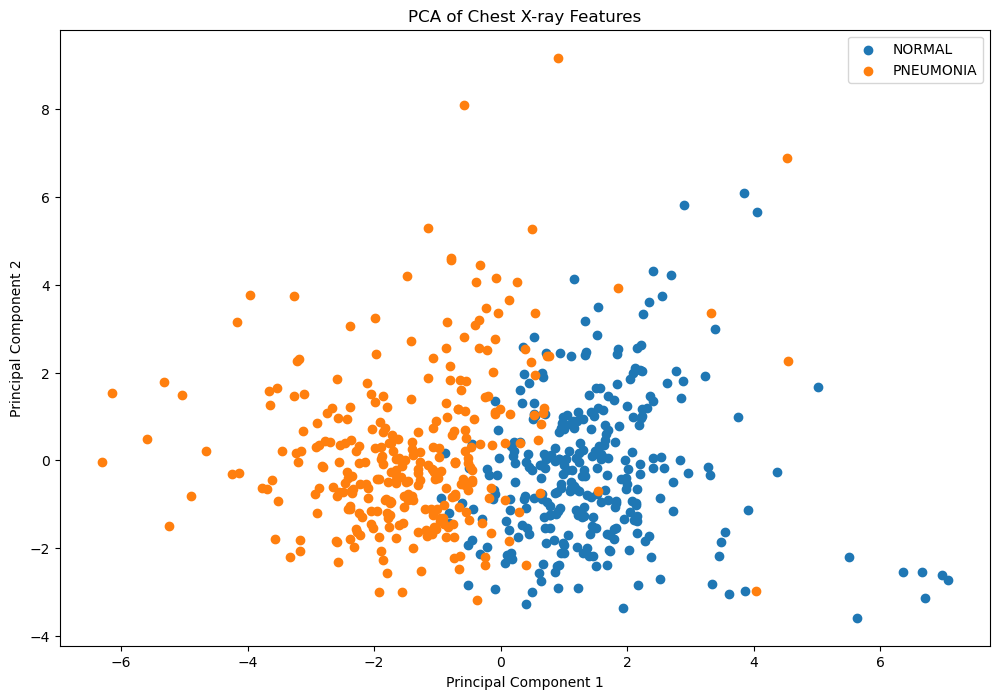

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load the dataset
df = pd.read_csv('feature_engineered_data.csv')

# separate features and labels
features = df.drop(columns=['label'])
labels = df['label']

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# do the PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['label'] = labels

# plot the PCA
plt.figure(figsize=(12, 8))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.title('PCA of Chest X-ray Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

From what I'm seeing here, it looks like the feature extraction worked pretty well! The normal images are mostly clustered together, and the pnuemoina ones form their own group too. There are a fewe outliers and some that are close to crossing into outlier territory, but overall, this is a good start. Now, the next goal is to tweak the feature extraction process further by adding some image processing techniques that could help make the differences between pneumonia and normal images even clearer. The first technique I'm going to explore is convolution. To get started, I'll randomly load a couple of sample X-rays each time I run this. This helps me test how the techniques work across a variety of images, but I'll also make sure to revisist any especially interesting results for a closer look.

# Loading and Visualizing Random X-ray Samples

To start, I needed to load some data to work with, but honestly, I wasn’t sure how to go about it, so I turned to ChatGPT for help. I reused some the code from my previous machine learning project since the dataset and folder structure were the same. For now, I’m focusing on just the training data, specifically, the NORMAL and PNEUMOINA folders, because I don’t need the validation or test data at this stage. 

The code does a few things. First, it grabs the paths for the images in the NORMAL and PNEUMONIA folders. Then, it randomly selects one image from each folder. After that, it uses PIL to open the images and convert them to grayscale. Turns out, the images weren’t grayscale by default, which was causing issues during processing. When I ran into trouble with the JPEG format, ChatGPT suggested converting the images to NumPy arrays, which solved the problem. 

Finally, I used Matplotlib to display the two images side by side, one random sample from the pneumonia folder and one from the normal folder. The best part is that every time you restart the notebook and run the code, it randomly picks two new images. It’s a simple way to get a fresh look at different samples from the dataset.  

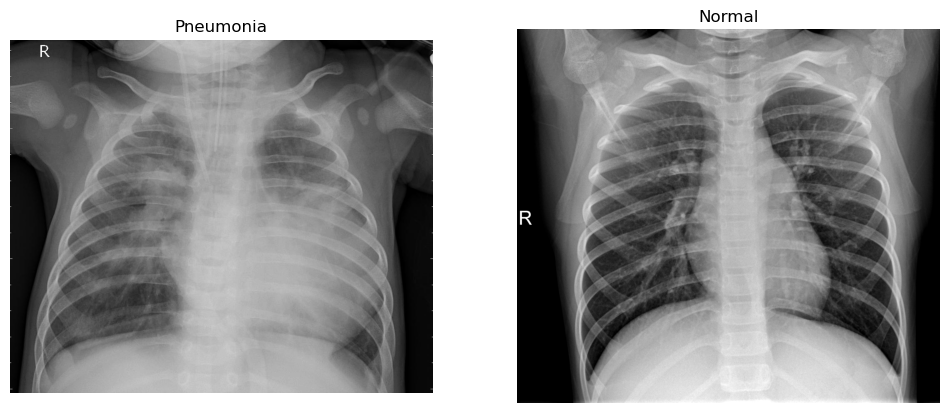

In [154]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# define paths for 'PNEUMONIA' and 'NORMAL' folders
base = '/Users/axellejimenez/Desktop/chest_xray'
pneumonia_dir = os.path.join(base, 'train', 'PNEUMONIA')
normal_dir = os.path.join(base, 'train', 'NORMAL')

# list files in the 'PNEUMONIA' and 'NORMAL' directories
pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

# randomly select one image from each folder
pneumonia_image_path = os.path.join(pneumonia_dir, random.choice(pneumonia_files))
normal_image_path = os.path.join(normal_dir, random.choice(normal_files))

# open the images using PIL and convert to grayscale
pneumonia_image = Image.open(pneumonia_image_path).convert('L')  # Convert to grayscale
normal_image = Image.open(normal_image_path).convert('L')  # Convert to grayscale

# convert images to numpy arrays
pneumonia_image_np = np.array(pneumonia_image)
normal_image_np = np.array(normal_image)

# plot the images side by side 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# display the images
ax[0].imshow(pneumonia_image, cmap='gray')
ax[0].set_title("Pneumonia")
ax[0].axis('off')  # Hide axis

ax[1].imshow(normal_image, cmap='gray')
ax[1].set_title("Normal")
ax[1].axis('off')  # Hide axis

plt.show()


Now that we have our samples, we can convolve our images.

# Convolution

For the convolution, I had a few goals in mind, First, I wanted to see if I could emphasize the pixel intensity in the image, so I decided to calculate the mean intensity of the convolved image. Second, I aimed to analyze the uniformity of the image by calculating the standard deviation of the intensity. Third, I wanted to use kurtosis to get a better sense of the “tallness” of the pixel intensity distribution in the images. 

To achieve this, I convolved the image using a method similar to what we covered in lecture for spatial filtering. The main change I made was adjusting the shape of the region used for the filter, keeping it the same shape for both images to make the comparison fair. Then, I calculated the statistics I was interested in, which were the mean intensity, standard deviation, and kurtosis, using np.mean, np.std, and the kurtosis function. 

Lastly, I used ChatGPT to help me display the convolved image alongside the calculated statistics. I also applied this code to the normal image to make a side-by-side comparison. Here’s the code I used.

Stats for Pneumonia Image:
- Mean Intensity: 258005.64
- Standard Deviation: 141545.15
- Kurtosis: 1.99


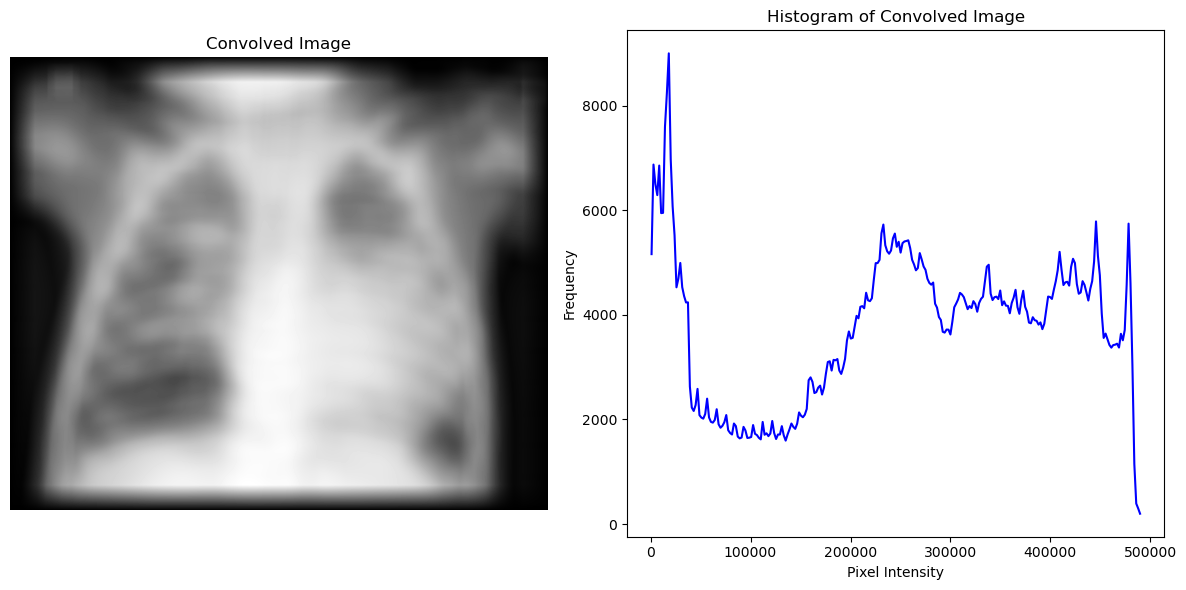

In [155]:
from scipy.signal import convolve 
from skimage.exposure import histogram
from scipy.stats import kurtosis
import numpy as np
import matplotlib.pyplot as plt

N = 50
selem = np.ones((N,N)) # structuring element

# you put in the noised image, and the structuring element in there
pneu_blurred = convolve(pneumonia_image_np, selem) 
    
# calculate statistics
mean_intensity = np.mean(pneu_blurred)
std_intensity = np.std(pneu_blurred)
kurtosis_value = kurtosis(pneu_blurred.flatten(), fisher=False)

# ChatGPT generated------------------------------------------
# i used ChatGPT to make the display, but I changed it a little bit

# display stats of pneumonia image
print(f"Stats for Pneumonia Image:")
print(f"- Mean Intensity: {mean_intensity:.2f}")
print(f"- Standard Deviation: {std_intensity:.2f}")
print(f"- Kurtosis: {kurtosis_value:.2f}")

pneu_blurred_hist, pneu_blurred_centers = histogram(pneu_blurred)

# create a side-by-side visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# convolved image
axs[0].imshow(pneu_blurred, cmap='gray')
axs[0].set_title("Convolved Image")
axs[0].axis('off')

# histogram
axs[1].plot(pneu_blurred_centers, pneu_blurred_hist, color='blue')
axs[1].set_title("Histogram of Convolved Image")
axs[1].set_xlabel("Pixel Intensity")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ------------------------------------------

Stats for Normal Image:
- Mean Intensity: 274174.81
- Standard Deviation: 164083.19
- Kurtosis: 1.97


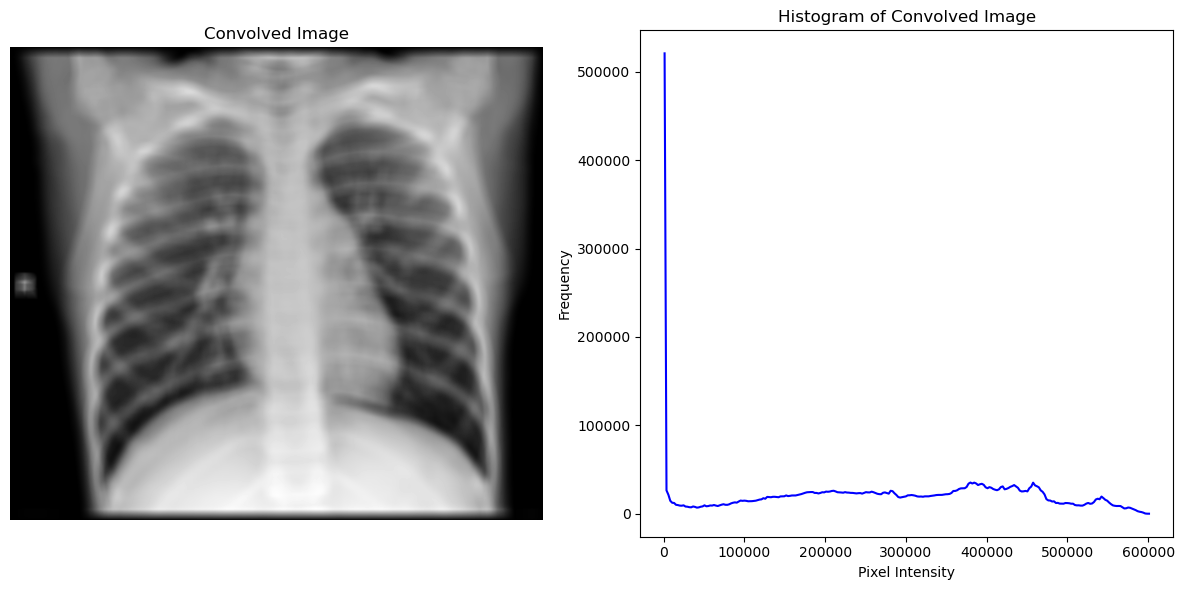

In [156]:
from scipy.signal import convolve 
from skimage.exposure import histogram
from scipy.stats import kurtosis
import numpy as np
import matplotlib.pyplot as plt

N = 50
selem = np.ones((N,N)) # structuring element

# you put in the noised image, and the structuring element in there
norm_blurred = convolve(normal_image_np, selem) 
    
# calculate statistics
mean_intensity = np.mean(norm_blurred)
std_intensity = np.std(norm_blurred)
kurtosis_value = kurtosis(norm_blurred.flatten(), fisher=False)

# ChatGPT generated------------------------------------------
# i just copied the code above 

# display stats of normal image
print(f"Stats for Normal Image:")
print(f"- Mean Intensity: {mean_intensity:.2f}")
print(f"- Standard Deviation: {std_intensity:.2f}")
print(f"- Kurtosis: {kurtosis_value:.2f}")

norm_blurred_hist, norm_blurred_centers = histogram(norm_blurred)


# create a side-by-side visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# convolved image
axs[0].imshow(norm_blurred, cmap='gray')
axs[0].set_title("Convolved Image")
axs[0].axis('off')

# histogram
axs[1].plot(norm_blurred_centers, norm_blurred_hist, color='blue')
axs[1].set_title("Histogram of Convolved Image")
axs[1].set_xlabel("Pixel Intensity")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ------------------------------------------

Since this notebook generates two random images each time I run it, I can’t interperet every single calculates statistic for each image. However, I can share the results and how they align with my expectations. 

Mean Intensity: Initially, I thought pneumonia images would likely have a lower mean intensity because the infected area might look darker compared to the normal tissue. But from what I observed, pneumonia images actually have higher mean intensities, likely because the pneumonia-affected areas appear brighter in the images. These abnormalities stand out, which makes sense given that they’re brighter.  

Standard Deviation: In my set of images, it looked like the pneumonia image had a slightly lower standard deviation than the normal image. This ties back to something I mentioned after the PCA, where I speculated that the infected areas in pneumonia images could be more uniform in certain parts. In the pneumonia image, there was a lot of pixelation, most of which were just bright pixels, with similar intensity values, explaining the lower standard deviation. The normal image, on the other hand, had more variation in pixel values, including grays, which led to a higher standard deviation.  

Kurtosis: Before looking at the images, I suspected that pneumonia images would have higher kurtosis due to sharper contrasts and more extreme pixel values. This aligned with what I found, the kurtosis value for the pneumonia images was indeed higher than the normal image. This suggests that pneumonia images have more pronounced outliers in pixel intensity, which I think is pretty interesting. It also seems to differ from what I observed when analyzing the average differences in the dataframe of 400 images. Maybe I’m picking up on deeper insights, or maybe these stats aren’t as useful as I thought.  

With all that in mind, I’m planning to integrate these insights into my feature extraction process to see if they help improve the differentiation of intensity values. Earlier, it seemed like the differences between the mean intensity and standard deviation weren’t as significant, so I’ll be testing whether these new features make a difference. 

Now that I analyzed the intensity and variation in the images, the next step I’m going to try is Otsu thresholding. This will let me convert the images to binary, making it easier to isolate the white pixels. From there, I’ll be able to calculate the white pixel percentage and see how much of the image is dominated by these brighter areas, which should help highlight any key differences between pneumonia and normal images.  

# Otsu-threshold

With Otsu thresholding, my goal was to convert the images to binary and calculate the percentage of white pixels. I wanted to see if pneumonia images had a higher percentage of white pixels, since pneumonia often makes certain areas, like the spine, heart, and ribs, appear brighter. If the thresholding picks up more white pixels, especially in the lungs, which should ideally blend in with the background, it could highlight abnormalities in the lung area.  

To do this, I use skimage’s threshold_otsu function to generate the Otsu threshold for both the pneumonia and normal images. This method automatically calculates the optimal threshold to separate foreground from background. I borrowed the code from one of our class lectures, and then used ChatGPT to help me format and print out the thresholds for both images. 

In [157]:
from skimage.filters import threshold_otsu

# otsu's threshold on pneumonia image and normal image
threshold_pneumonia = threshold_otsu(pneumonia_image_np)
threshold_normal = threshold_otsu(normal_image_np)

# ChatGPT generated --------------------------------------
# it gave me more code, but I didn't need it in the moment

print(f"Pneumonia image threshold: {threshold_pneumonia}")
print(f"Normal image threshold: {threshold_normal}")

Pneumonia image threshold: 108
Normal image threshold: 107


Next, I applied the Otsu threshold to both the pneumonia and normal images. I used the same code from the lecture for this step as well. After that, I calculated the percentage of pixels in each binary image, which gives me an idea of how much of the image is highlighted as significant, which are white pixels. To do this, I checked how many white pixels there were copmared to the total number of pixels in the image. Finally, I asked ChatGPT to help me format the results and visualize the binary images with the calculated white pixel percentages. 

Percentage of white pixels in Pneumonia binary image: 56.59%
Percentage of white pixels in Normal binary image: 56.00%


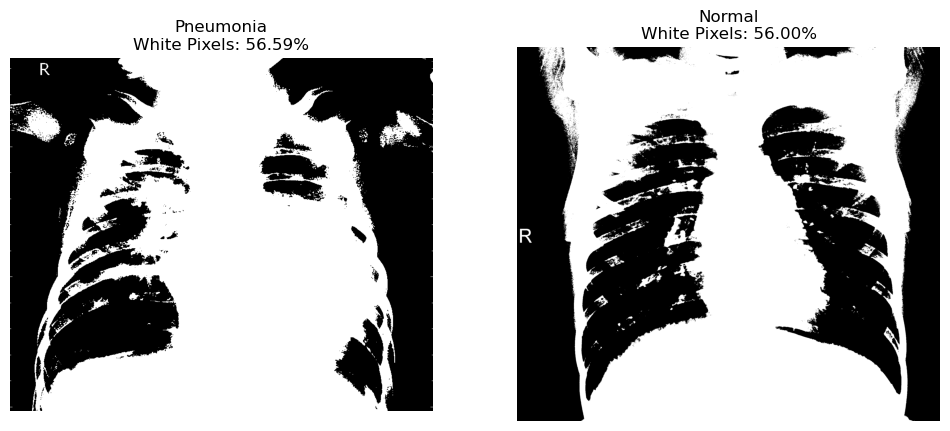

In [158]:
# apply otsu threshold to make binary images
pB=pneumonia_image_np >threshold_pneumonia 
nB=normal_image_np > threshold_normal 

# calculate the percentage of white pixels
pB_white_ratio = np.sum(pB) / pB.size * 100
nB_white_ratio = np.sum(nB) / nB.size * 100

# ChatGPT generated ----------------------------------------------------------------
print(f"Percentage of white pixels in Pneumonia binary image: {pB_white_ratio:.2f}%")
print(f"Percentage of white pixels in Normal binary image: {nB_white_ratio:.2f}%")

# plot the binary images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(pB, cmap='gray')
ax[0].set_title(f"Pneumonia\nWhite Pixels: {pB_white_ratio:.2f}%")
ax[0].axis('off')  # Hide axis

ax[1].imshow(nB, cmap='gray')
ax[1].set_title(f"Normal\nWhite Pixels: {nB_white_ratio:.2f}%")
ax[1].axis('off')  # Hide axis

plt.show()

From what I saw with my set of images, the pneumonia image had a higher percentage of white pixels compared to the normal image. This lines up with what I expected before doing the thresholding, since the pneumonia areas usually appear brighter in the X-ray images. With this result, I’m planning to use Otsu-thresholding and the white pixel percentage as part of my feature extraction. Hopefully, it’ll help highlight more of the intensity differences between pneumonia and normal images. 

Now that I explored the white pixel percentages with Otsu-thresholding, I want to move on to another technique, Canny edge detection. This will help me focus on the edges in the images and see if there’s more detail or sharpness around the pneumonia areas compared to the normal images. By detecting the boundaries more clearly, I can get a better sense of how the features differ between the two classes.  

# Canny 

We briefly looked over Canny in one of the lectures. I used Canny in this project with some inpsiration from an article where these scientists did some feature engineering and applied a Canny feature to look at the differences in edges in pneumonia and normal images. With that inspiration, I did this. However, I didn not entirely know how to do this. Thankfully, ChatGPT helped me generate code specifically to help me quantify the ratio of edge pixels to the total pixels of an image. In theory, the less edges there are, then that means there is pneumonia, beacuse pneumonia can disrupt the shape of the ribcage, spine, or heart, since it doesn't have a defininte shape. 

First, I applied the Canny edge detector to both the pneumonina and normal images. The sigma value adjusts the sensitivity of the detector, and I used sigma = 1 as a starting point.

Then, I calculates the edge density for each image, which is the ratio of edge pixels, detected by Canny, to the total number of pixels in the image. The idea is that if a the pneumonia image has fewer edges, it could suggest irregularites in the shape.

Finally, I used Matplotlib to plot both images side by side, showing the edges and their respective densities. 

Edge Density - Pneumonia: 0.0226, Normal: 0.0117


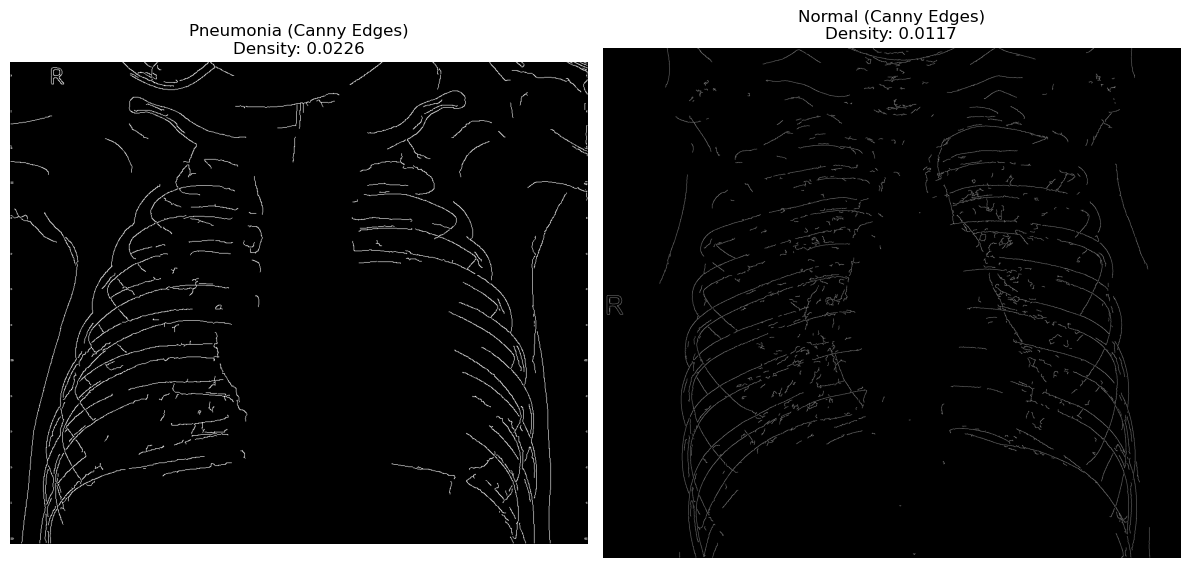

In [159]:
from skimage import feature
from scipy.ndimage import label
import numpy as np
import matplotlib.pyplot as plt

# apply canny edge detection
sigma_value = 1  # adjust sensitivity
pneumonia_edges = feature.canny(pneumonia_image_np, sigma=sigma_value)
normal_edges = feature.canny(normal_image_np, sigma=sigma_value)

# ChatGPT generated------------------------------------------------------

# quantify differences
# edge density: ratio of edge pixels to total pixels
pneumonia_density = np.sum(pneumonia_edges) / pneumonia_edges.size
normal_density = np.sum(normal_edges) / normal_edges.size

print(f"Edge Density - Pneumonia: {pneumonia_density:.4f}, Normal: {normal_density:.4f}")

# plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# binary canny edges
axs[0].imshow(pneumonia_edges, cmap='gray')
axs[0].set_title(f"Pneumonia (Canny Edges)\nDensity: {pneumonia_density:.4f}")
axs[0].axis('off')

axs[1].imshow(normal_edges, cmap='gray')
axs[1].set_title(f"Normal (Canny Edges)\nDensity: {normal_density:.4f}")
axs[1].axis('off')

plt.tight_layout()
plt.show()

From what I saw with my set of images, my theory turned out to be right. The pneumonia image has few edges, and some edges are even missing around the spine and lungs, in contrast, the normal image shows more detailed edges, especially around the spine, ribs, heart, and lungs. I’m planning to use the edge density to help further differentiate between pneumonia and normal images, hoping it’ll give me better results. 

Now that I looked at edge detection with Canny, I want to dive into another technique, skeletonization. This will help me analyze the structural features of the pneumonia and normal images. Skeletonization reduces the shapes in the image to their simplest form, making it easier to spot key differences in the lung regions. Let’s see how it works.  

# Skeletonization

The last technique I tried was skeletonizing the pneumonia and normal images. I used the same code from the last lecture because it was exactly what I needed. Then, I compared how the images looked after applying the technique. 

First, I skeletonized the binary images. Then, I used ChatGPT calculate me the length of the skeleton, which is how much the image is skeletonized. Then, I calculated the edge density, which is the ratio of the skeleton's length to the size of the image. Then ChatGPT detected how many edges there were in both images. Finally, ChatGPT printed out the stats and plotted the skeletonized images. 

Pneumonia Skeleton Length: 28331
Pneumonia Skeleton Density: 3.29%
Pneumonia Edge Count: 478
Normal Skeleton Length: 159055
Normal Skeleton Density: 3.12%
Normal Edge Count: 3233


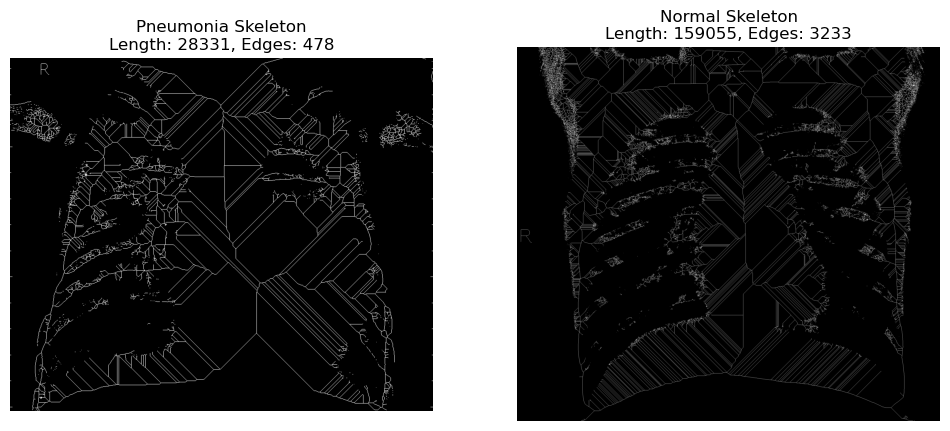

In [160]:
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import numpy as np

# skeletonize binary images
pB_skeleton = skeletonize(pB)
nB_skeleton = skeletonize(nB)


# CHAT GPT----------------------------

# calculate skeleton length
pB_skel_length = np.sum(pB_skeleton)
nB_skel_length = np.sum(nB_skeleton)
# -------------------------------------

# calculate edge density 
pB_skel_density = pB_skel_length / pB.size * 100
nB_skel_density = nB_skel_length / nB.size * 100


# CHAT GPT ------------------------------------------------------

# detect connected components (branches/objects) in the skeleton
pB_labels = label(pB_skeleton)
nB_labels = label(nB_skeleton)
pB_edge_count = len(regionprops(pB_labels))
nB_edge_count = len(regionprops(nB_labels))

# print skeletonization results
print(f"Pneumonia Skeleton Length: {pB_skel_length}")
print(f"Pneumonia Skeleton Density: {pB_skel_density:.2f}%")
print(f"Pneumonia Edge Count: {pB_edge_count}")

print(f"Normal Skeleton Length: {nB_skel_length}")
print(f"Normal Skeleton Density: {nB_skel_density:.2f}%")
print(f"Normal Edge Count: {nB_edge_count}")

# plot skeletonized images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(pB_skeleton, cmap='gray')
ax[0].set_title(f"Pneumonia Skeleton\nLength: {pB_skel_length}, Edges: {pB_edge_count}")
ax[0].axis('off')

ax[1].imshow(nB_skeleton, cmap='gray')
ax[1].set_title(f"Normal Skeleton\nLength: {nB_skel_length}, Edges: {nB_edge_count}")
ax[1].axis('off')

plt.show()

When I first saw the skeletonized pneumonia image. I thought it looked cool, almost like a pair of lungs. But then I realized the spine was too thin, and there were all these strange lines around the chest. It didn’t really make sense. This is where the blurriness from pneumonia comes into play. It hides edges and details, making the image hard to define, especially structures like the rib cage and lungs. The skeletonized image was just random lines, with the spine visible but distorted, and no clear shapes. 

In contrast, the skeletonized normal image looked much clearer. The spine was visible, connected to the heart, and the rib cage edges were well-defined. There were no random lines in the lung or rib areas, making it obvious that the chest X-ray was healthy. 

These differences will help with the feature extraction. The undefined skeleton in pneumonia images and the clearer, more defined one in normal images should be useful for distinguishing between the two in our feature engineering.  

# Second Feature Extraction

In [161]:
# ChatGPT -------------------------------------------
import os
import numpy as np
import pandas as pd
from skimage import io, filters, feature
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.measure import regionprops, shannon_entropy, label
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
from scipy.stats import skew, kurtosis

# define base path
base_path = '/Users/axellejimenez/Desktop/chest_xray'

# define the categories and the split to process
split = 'train'
categories = ['NORMAL', 'PNEUMONIA']

# initialize the feature storage
feature_data = []

# get the first 300 images from each category in the training set
for category in categories:
    category_path = os.path.join(base_path, split, category)
    
    if not os.path.exists(category_path):
        print(f"Warning: Category folder '{category}' not found in '{split}'. Skipping...")
        continue
    
    # get the first 10 image files from each category
    all_files = [f for f in os.listdir(category_path) if f.endswith('.jpeg')]
    selected_files = all_files[:300]  # Select the first 10 files

    # process the selected images
    for file in selected_files:
        try:
            # get image path and load the image
            image_path = os.path.join(category_path, file)
            image = io.imread(image_path, as_gray=True)
            
            # convert to uint8 if necessary
            image = (image * 255).astype(np.uint8)

            # feature extraction (texture, shape, etc.)
            features = {}

            # texture features (GLCM)
            glcm = graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
            features['contrast'] = graycoprops(glcm, 'contrast')[0, 0]
            features['correlation'] = graycoprops(glcm, 'correlation')[0, 0]
            features['energy'] = graycoprops(glcm, 'energy')[0, 0]
            features['homogeneity'] = graycoprops(glcm, 'homogeneity')[0, 0]

            # shape features (Otsu's thresholding, region properties)
            threshold_value = threshold_otsu(image)
            binary_image = image > threshold_value
            binary_image = binary_image.astype(np.uint8)  # convert to uint8 for regionprops
            regions = regionprops(binary_image)
            
            if regions:  # if a region is detected
                region = regions[0]
                features['area'] = region.area
                features['perimeter'] = region.perimeter
                features['eccentricity'] = region.eccentricity
                features['solidity'] = region.solidity
                features['compactness'] = (4 * np.pi * region.area) / (region.perimeter ** 2)

            # statistical Features
            features['mean_intensity'] = np.mean(image)
            features['std_intensity'] = np.std(image)
            features['skewness'] = skew(image.flatten())
            features['kurtosis'] = kurtosis(image.flatten())
            features['entropy'] = shannon_entropy(image)
            lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
            features['lbp_mean'] = lbp.mean()

            # edge & complexity features
            fd, _ = hog(image, visualize=True)
            features['hog_mean'] = fd.mean()  # simplified HOG

            # Skeletonization Features
            skeleton = skeletonize(binary_image)
            features['skeleton_length'] = skeleton.sum()
            features['skeleton_density'] = (skeleton.sum() / binary_image.size) * 100
            features['skeleton_edge_count'] = len(regionprops(label(skeleton)))

            # binary image features
            features['white_pixel_ratio'] = (binary_image.sum() / binary_image.size) * 100

            # convolved image features
            convolved_image = filters.gaussian(image, sigma=1)
            features['convolved_mean_intensity'] = np.mean(convolved_image)
            features['convolved_std_intensity'] = np.std(convolved_image)
            features['convolved_kurtosis'] = kurtosis(convolved_image.flatten())

            # canny edge density
            edges = feature.canny(image, sigma=1)
            features['canny_density'] = (np.sum(edges) / edges.size) * 100

            # append features and label (pneumonia or normal)
            features['label'] = category
            feature_data.append(features)
        
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue

# convert to DataFrame
df = pd.DataFrame(feature_data)

# save DataFrame to CSV
df.to_csv('feature_engineered_data.csv', index=False)

print("Feature extraction completed for the first 300 images from each category.")


Feature extraction completed for the first 300 images from each category.


In [162]:
df

,contrast,correlation,energy,homogeneity,area,perimeter,eccentricity,solidity,compactness,mean_intensity,...,hog_mean,skeleton_length,skeleton_density,skeleton_edge_count,white_pixel_ratio,convolved_mean_intensity,convolved_std_intensity,convolved_kurtosis,canny_density,label
0,252.832763,0.960252,0.020208,0.185353,2149650.0,210216.707592,0.544537,0.411537,0.000611,127.617949,...,0.100022,303271,5.754661,15620,40.790276,0.500458,0.216615,-0.500350,4.026124,NORMAL
1,140.021814,0.978829,0.081340,0.368467,629019.0,42874.303582,0.830791,0.436188,0.004300,119.762837,...,0.089943,57120,3.764646,2170,41.457179,0.469658,0.222813,0.009253,1.766919,NORMAL
2,117.566445,0.983610,0.083593,0.368075,1126252.0,51858.593980,0.815291,0.468358,0.005263,100.857048,...,0.088477,72170,2.909381,2312,45.402476,0.395515,0.232662,-0.707763,1.659722,NORMAL
3,129.109276,0.986028,0.142800,0.396266,1400485.0,56636.234309,0.725878,0.544644,0.005487,107.879485,...,0.082716,89446,3.227082,2304,50.527468,0.423057,0.264329,-0.940504,1.984104,NORMAL
4,80.482886,0.986220,0.053182,0.321370,1639796.0,72533.552770,0.756889,0.392353,0.003917,95.045663,...,0.093904,117963,2.734801,3689,38.016286,0.372728,0.210260,-0.387700,0.992650,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,225.176831,0.947533,0.038750,0.548107,314869.0,14874.927409,0.831759,0.535696,0.017883,160.464104,...,0.078503,19627,3.339197,115,53.569557,0.629271,0.176353,-0.852194,2.412824,PNEUMONIA
596,142.860246,0.975671,0.063950,0.387435,446960.0,25111.933716,0.871618,0.440919,0.008907,97.871762,...,0.088389,30042,2.877393,508,42.809390,0.383811,0.209556,-0.079222,2.324940,PNEUMONIA
597,68.043193,0.985955,0.029057,0.445004,338542.0,19670.461136,0.902524,0.439548,0.010995,148.238798,...,0.088453,26638,3.448374,521,43.825342,0.581328,0.191533,-0.980919,2.664147,PNEUMONIA
598,19.209555,0.995607,0.057449,0.503995,123626.0,1835.392965,0.787858,0.902775,0.461171,161.957821,...,0.078332,1162,0.822073,4,87.460913,0.635128,0.183645,2.960212,3.274850,PNEUMONIA


In [163]:
# group data by 'label' and calculate mean for each feature
feature_means = df.groupby('label').mean()
feature_means

,contrast,correlation,energy,homogeneity,area,perimeter,eccentricity,solidity,compactness,mean_intensity,...,lbp_mean,hog_mean,skeleton_length,skeleton_density,skeleton_edge_count,white_pixel_ratio,convolved_mean_intensity,convolved_std_intensity,convolved_kurtosis,canny_density
label,,,,,,,,,,,,,,,,,,,,,
NORMAL,160.940743,0.978075,0.085621,0.345497,1.119520e+06,60734.445717,0.737857,0.483613,0.004759,112.960864,...,5.328794,0.089191,87369.626667,3.631523,2857.313333,46.353168,0.442980,0.235337,-0.492426,2.074569
PNEUMONIA,195.514677,0.971969,0.060574,0.467250,4.117544e+05,24970.313112,0.838786,0.428649,0.019564,124.367509,...,5.249878,0.084048,29360.066667,2.880306,590.776667,41.895376,0.487715,0.212108,-0.150808,2.423254


# Second PCA Analysis

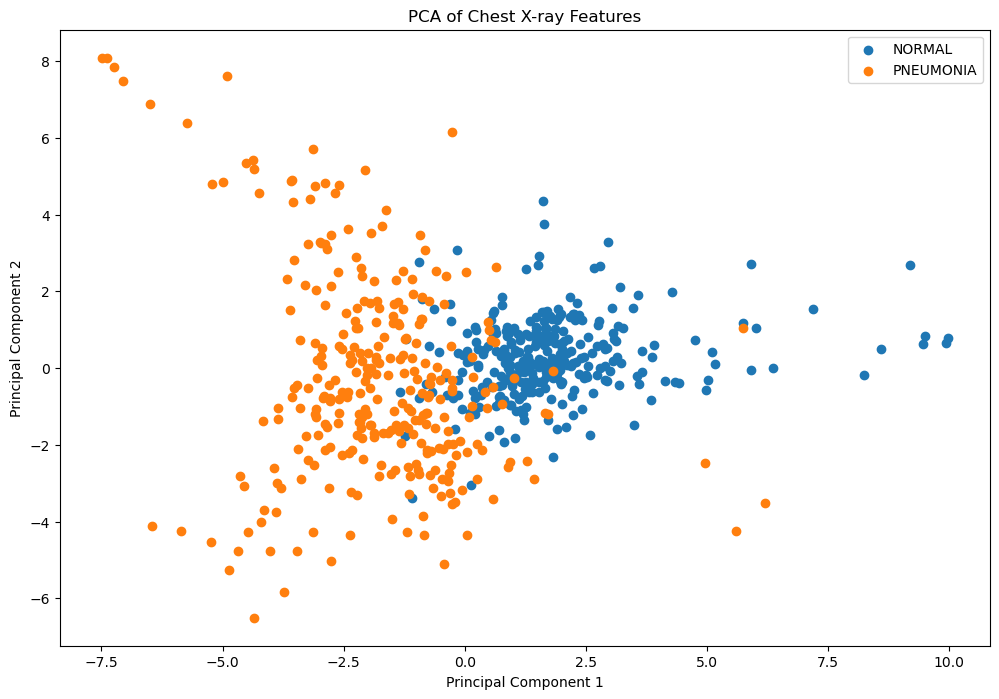

In [168]:
# ChatGPT ------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load the dataset
df = pd.read_csv('feature_engineered_data.csv')

# separate features and labels
features = df.drop(columns=['label'])
labels = df['label']

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# do the PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['label'] = labels

# plot the PCA
plt.figure(figsize=(12, 8))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.title('PCA of Chest X-ray Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Looking at the graph, I think my improved feature analysis did a bit better this time. Most of the normal images are clustered close together, and the pneumonia images are also slightly more grouped. However, i don’t think it made a huge difference in clustering the pneumonia images. Some of them are closer together, but there’s still overlap with the cllustered normal images.

On the bright side, the outliers for pneumonia aren’t as bad as before.  Most of them are on the left side of the graph with the other pneumonia images, and they kind of follow a path toward the main cluster. So, there aren’t as many scattered outliers either. I think the next step is to figure out which features aren’t helping to cluster the images properly. ChatGPT suggested that I run a T-test to narrow down the features that matter most.

# T - Test

After running a PCA, ChatGPT suggested doing a T-test to see if certain features show significant differences between pneumonia and normal images. This is super important because it helps me figure out which features might not be useful for feature engineering. Plus, if I decide to revisit my machine learning model for pneumonia detection later, I can focus on the features that actually matter. 

In a T-test, the goal is to see if the differences between two groups, like in this case, pneumonia or normal, are statistically significant. For this, the p-value, which acts like a threshold, needs to be less than 0.05. This 0.05 cutoff is pretty standard for T-tests, even in medical machine learning. Based on ChatGPT’s help, I generated code to perform the T-test and analyze my features.  

In [173]:
import pandas as pd
from scipy import stats

# load your feature-engineered DataFrame
df = pd.read_csv('feature_engineered_data.csv')

# get list of feature columns (excluding the 'label' column)
feature_columns = [col for col in df.columns if col != 'label']

# initialize a list to store results
results_list = []

# iterate over all features
for feature in feature_columns:
    try:
        # separate the data by label
        pneumonia_values = df[df['label'] == 'PNEUMONIA'][feature]
        normal_values = df[df['label'] == 'NORMAL'][feature]

        # check if both groups have data
        if pneumonia_values.empty or normal_values.empty:
            raise ValueError(f"No data for feature '{feature}' in one of the groups")

        # perform the t-test
        t_stat, p_value = stats.ttest_ind(pneumonia_values, normal_values, equal_var=False)

        # determine significance
        significance = 'Yes' if p_value < 0.05 else 'No'

        # append the result as a dictionary
        results_list.append({
            'Feature': feature,
            'T-Statistic': t_stat,
            'P-Value': p_value,
            'Significant': significance
        })
    except Exception as e:
        print(f"Error processing feature '{feature}': {e}")

# convert results list to a DataFrame
results = pd.DataFrame(results_list)
# save results to CSV for review
results.to_csv('t_test_results.csv', index=False)

# print summary
print("T-tests completed. Results saved to 't_test_results.csv'.")


T-tests completed. Results saved to 't_test_results.csv'.


In [174]:
results

,Feature,T-Statistic,P-Value,Significant
0,contrast,1.608808,1.086356e-01,No
1,correlation,-3.017109,2.740347e-03,Yes
2,energy,-7.595305,1.196587e-13,Yes
3,homogeneity,21.042915,1.992432e-70,Yes
4,area,-23.262097,1.770476e-79,Yes
5,perimeter,-18.170145,3.043505e-57,Yes
6,eccentricity,14.409678,1.788564e-40,Yes
7,solidity,-5.259514,2.245664e-07,Yes
8,compactness,4.654381,4.871467e-06,Yes
9,mean_intensity,8.103493,5.703728e-15,Yes


So, I ran the T-test, and it turns out that almost all of the features, except for contrast, showed significant differences on average. This means they’re actually useful for distinguishing between pneumonia and normal images. Contrast didn’t make the cut, so I’ll probably leave it out in the future. Honestly, I’m glad most of the features worked out because it saves me the hassle of rethinking everything.  

# Conclusion

This project was a journey, and honestly, it felt way longer than I expected. Looking back, I probably could have done something simpler, maybe skip a few steps that weren’t totally necessary. But in the end, I accomplished what I set out to do, which was to identify significant differences throughout feature engineering. And not just once, but twice. 

I hit a lot of roadblocks along the way. At first, I had a direction, but my initial draft didn’t really meet the expectations for the project. Then, when I tried to adjust, I realized how little I knew about feature engineering and how limited my time was. Still, with help from my professor, ChatGPT, an endless supply of soda waters, and a lot of late nights, I managed to pull it off. 

Now, if I wanted to, I could take this feature engineering work and plug it into my machine learning model for pneumonia detection. That’s pretty exciting! I learned so much from this project – not just about feature engineering, but also about pushing through challenges. Tackling something this though showed me that I can take on projects outside of my comfort zone and make it work. Honestly, I’m really proud of what I accomplished, even if it was hard, like really hard.

**I used the following conversations with LLMs to complete this assignment:**

300 images per category:https://chatgpt.com/c/675af7da-073c-8005-8bd7-93b0d9ff6715

for the feature engineering start: https://chatgpt.com/c/675ada12-4220-8005-8021-1b2a7ea14a13

to make it look at the first 300 images in each category: https://chatgpt.com/c/675adbfe-75d4-8005-8f3a-936d74fd1b4f

PCA: https://chatgpt.com/c/675ae02d-4bf0-8005-9719-97ccaef0277b

random sample pneumonia: https://chatgpt.com/c/675ae373-d0e4-8005-9584-ab831be2feb8

convolution display: https://chatgpt.com/c/675ae693-f700-8005-bbde-3207f300be04

otsu threshold format: https://chatgpt.com/c/675ae862-6870-8005-b0e6-d7684bbcdb1b

canny edge ratio and format: https://chatgpt.com/c/675aedb5-2e20-8005-a02c-082daaeefda7

skeletonization: https://chatgpt.com/c/675aedb5-2e20-8005-a02c-082daaeefda7

second feature engineering: https://chatgpt.com/c/675af4df-ae30-8005-a556-2d794b7fb1f1

t-test: https://chatgpt.com/c/675af66d-c26c-8005-8c84-2a9f4b43e498